In [98]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [99]:
def load_data(filepath):
    data = pd.read_csv(filepath)
    return data

data = load_data('heart.csv')

In [100]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


---
**`Scatterplot Matrix`** 

*shows pairwise relationships between numerical features while also encoding the target (presence or absence of heart disease).*

Creating Scatterplot Matrix...


<Figure size 1200x1000 with 0 Axes>

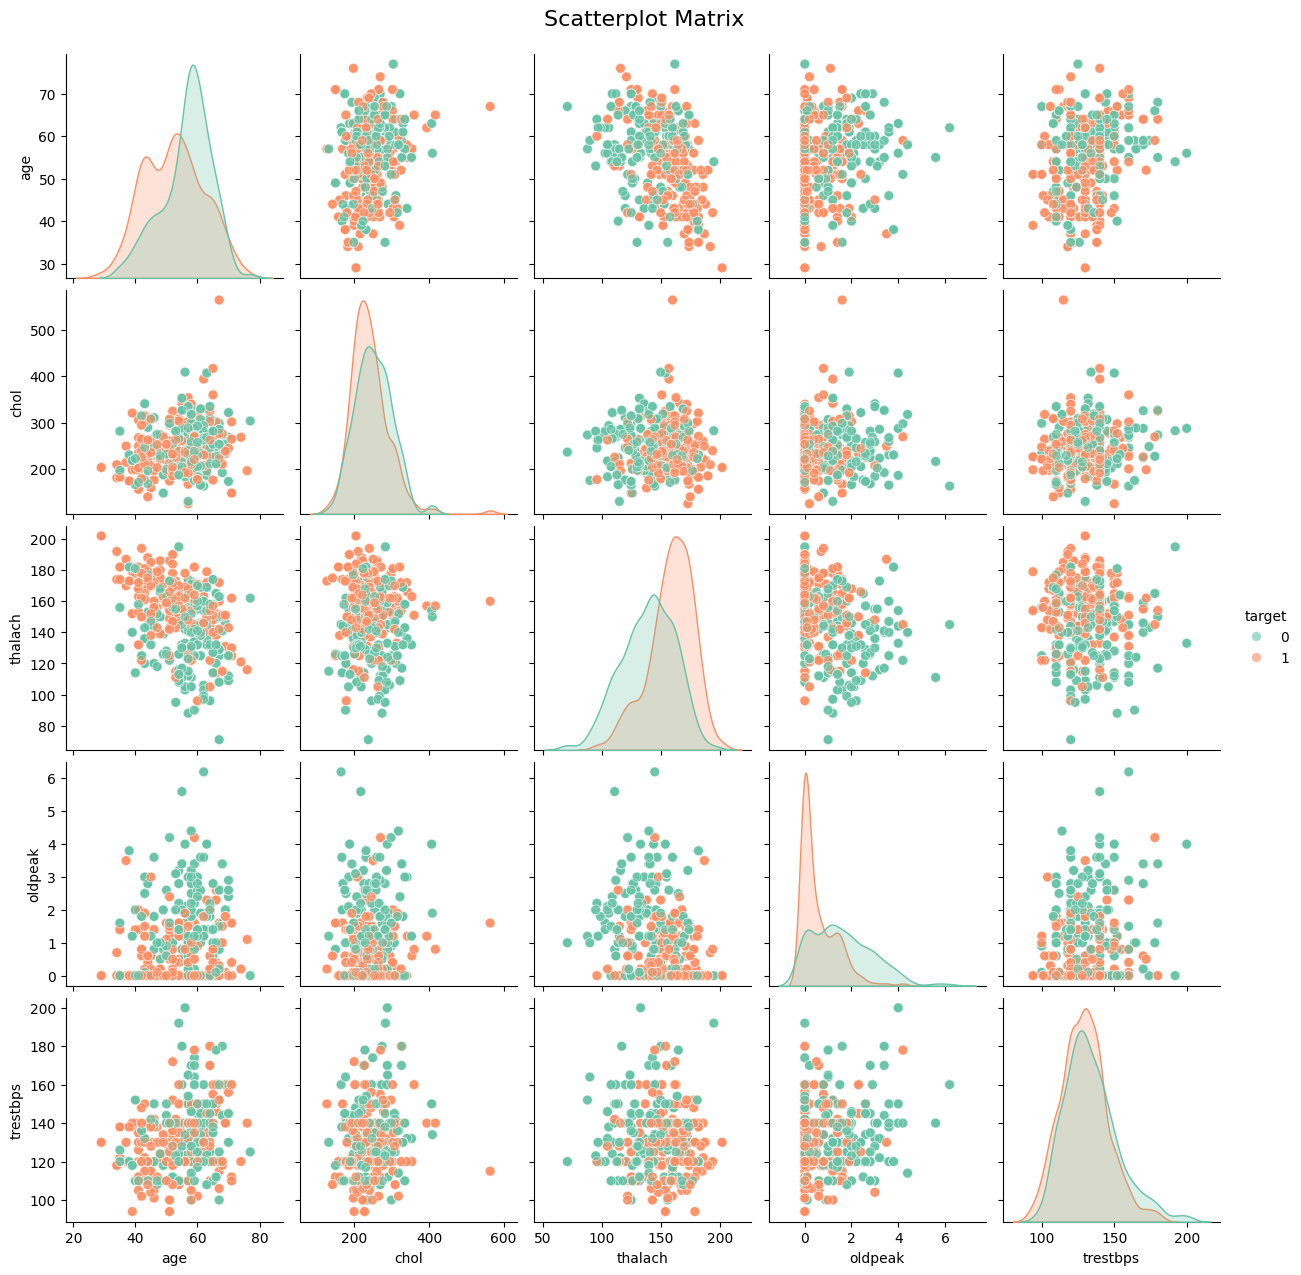

In [102]:
def scatterplot_matrix(data,selected_features, target_column):
    plt.figure(figsize=(12, 10))
    sns.pairplot(
        data[selected_features + [target_column]],
        hue=target_column,
        diag_kind="kde",
        palette="Set2",
        plot_kws={"alpha": 0.6, "s": 50},
    )
    plt.suptitle("Scatterplot Matrix", y=1.02, fontsize=16)
    plt.show()


selected_features = ['age', 'chol', 'thalach', 'oldpeak', 'trestbps']
print("Creating Scatterplot Matrix...")
scatterplot_matrix(data,selected_features, 'target')

- **Clusters and Trends:** *Some plots show the two classes (Target = 0 and Target = 1) to be in a clearly clustered. For example, "thalach" and "oldpeak" features are likely to show some sort of trend as to how the heart-disease patients are distinct from others.*

- **Feature Interaction:** *As an example, "age" and "thalach" could indicate older patients tend to have a lower heart rate*

- **Distributions:** *The diagonals depict the distribution of individual features. The differences in distributions, such as Target 1 having higher "oldpeak" values compared to Target 0, indicate their predictive significance.*

---
**`Heatmap with Correlation Matrix`** 

*quantifies the pairwise relationships between all features, highlighting features with strong positive or negative correlations.*

Creating Heatmap of Correlation Matrix...


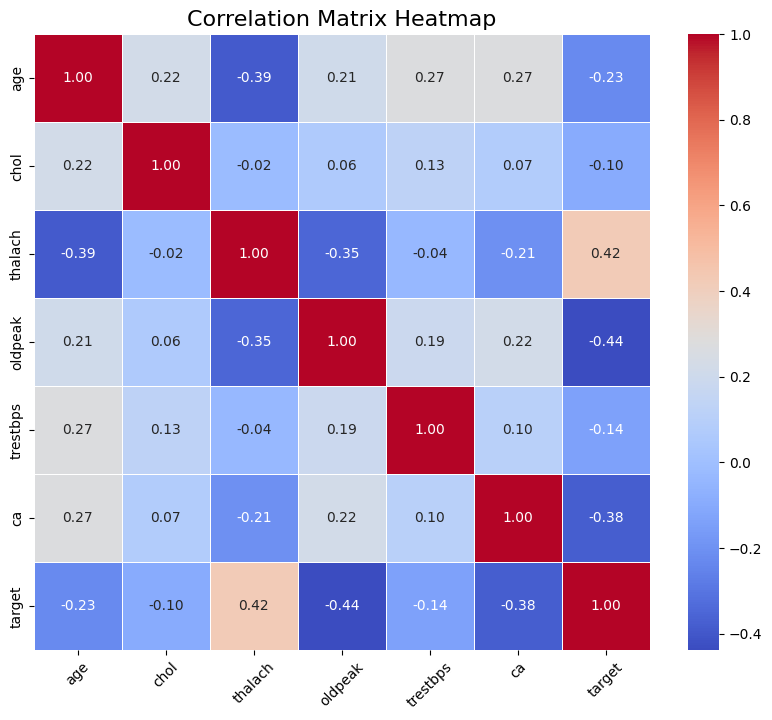

In [103]:
def heatmap_correlation_matrix(data, selected_features):
    plt.figure(figsize=(10, 8))
    correlation_matrix = data[selected_features].corr()
    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        cbar=True,
        square=True,
        linewidths=0.5,
        annot_kws={"size": 10},
    )
    plt.title("Correlation Matrix Heatmap", fontsize=16)
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10)
    plt.show()


selected_features = ['age', 'chol', 'thalach','oldpeak', 'trestbps', 'ca', 'target']
print("Creating Heatmap of Correlation Matrix...")
heatmap_correlation_matrix(data, selected_features)

- **High Correlations:** *Features such as "thalach" (maximum heart rate) and "target" are strongly correlated in either a positive or negative sense, indicating this feature is a good predictor.*

- **Multicollinearity:** *Certain features like "ca" (number of major vessels) and "thal" (types of thalassemia) might be strongly correlated to each other.*

- **Non-correlated Features:** *Features that have low correlations (close to 0) with the "target" may not help much with classification. For example, "chol" (cholesterol) might not have a strong link to the outcome.*

---
**`Parallel Coordinates Plot`** 

*multi-dimensional data by showing each data instance as a line connecting scaled feature values, color-coded by the target.*

Creating Parallel Coordinates Plot...


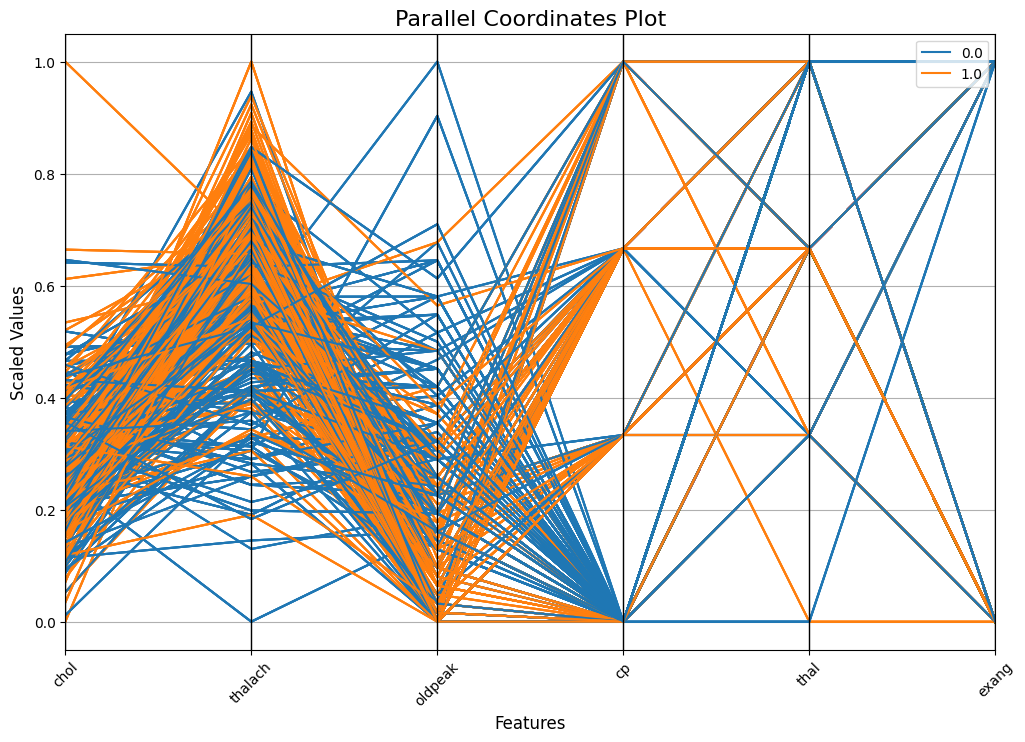

In [104]:
def parallel_coordinates_plot(data,selected_features, target_column):
    data_set = data[selected_features + [target_column]].copy()
    numerical_cols = data_set.select_dtypes(include=['float64', 'int64']).columns
    scaler = MinMaxScaler()
    data_set[numerical_cols] = scaler.fit_transform(data_set[numerical_cols])

    plt.figure(figsize=(12, 8))
    parallel_coordinates(
        data_set, class_column=target_column, color=["#1f77b4", "#ff7f0e"]
    )
    plt.title("Parallel Coordinates Plot", fontsize=16)
    plt.xlabel("Features", fontsize=12)
    plt.ylabel("Scaled Values", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()


selected_features = ['chol','thalach','oldpeak', 'cp', 'thal', 'exang']
print("Creating Parallel Coordinates Plot...")
parallel_coordinates_plot(data,selected_features, 'target')

- **Patterns for Classes:** *Features such as "thalach" (maximal heart rate) and "oldpeak" tend to have patterns that are similar. Patients with heart disease (Target 1) tend to have higher values of "thalach" and lower values of "oldpeak" compared to those without heart disease (Target 0).*

- **Chaotic or Overlapping Lines:** *Many of the lines for the two classes overlap, then the features do not clearly separate the classes. For example, the "chol" (cholesterol) lines for Target 0 and Target 1 completely overlap, then this feature is not useful for prediction.*

**`Data Preprocessing`**

In [105]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['cp', 'restecg', 'slope', 'ca', 'thal']

***Data Preprocessing for Logistic Regression:***

In [106]:
log_reg_numerical_transformer = StandardScaler()
log_reg_categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [107]:
log_reg_preprocessor = ColumnTransformer(
    transformers=[
        ('num', log_reg_numerical_transformer, numerical_features),
        ('cat', log_reg_categorical_transformer, categorical_features)
    ]
)

***Data Preprocessing for Random Forest:***

In [108]:
rf_categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [109]:
rf_preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', rf_categorical_transformer, categorical_features)
    ]
)

***Divide the dataset into training and testing subsets.***

In [110]:
X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Training set class distribution:")
print(y_train.value_counts(normalize=True))
print("\nTesting set class distribution:")
print(y_test.value_counts(normalize=True))

print("\nTraining set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set class distribution:
target
1    0.513415
0    0.486585
Name: proportion, dtype: float64

Testing set class distribution:
target
1    0.512195
0    0.487805
Name: proportion, dtype: float64

Training set size: 820
Testing set size: 205


**`Logistic Regression Model`**

In [111]:
log_reg_pipeline = Pipeline([
    ('preprocessor', log_reg_preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cp', 'restecg', 'slope',
                                                   'ca', 'thal'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [112]:
log_reg_y_train_pred = log_reg_pipeline.predict(X_train)
log_reg_y_test_pred = log_reg_pipeline.predict(X_test)

**`Random Forest Model`**

In [113]:
rf_pipeline = Pipeline([
    ('preprocessor', rf_preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42
    ))
])
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cp', 'restecg', 'slope',
                                                   'ca', 'thal'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=5, min_samples_leaf=5,
                                        min_samples_split=10,
                                        random_state=42))])

In [114]:
rf_y_train_pred = rf_pipeline.predict(X_train)
rf_y_test_pred = rf_pipeline.predict(X_test)

**`Model Evaluation`**

In [115]:
log_reg_train_acc = accuracy_score(y_train, log_reg_y_train_pred)
log_reg_test_acc = accuracy_score(y_test, log_reg_y_test_pred)

print("Logistic Regression")
print(f"Training Accuracy: {log_reg_train_acc:.2f}")
print(f"Testing Accuracy: {log_reg_test_acc:.2f}")

Logistic Regression
Training Accuracy: 0.87
Testing Accuracy: 0.88


In [116]:
rf_train_acc = accuracy_score(y_train, rf_y_train_pred)
rf_test_acc = accuracy_score(y_test, rf_y_test_pred)

print("Random Forest")
print(f"Training Accuracy: {rf_train_acc:.2f}")
print(f"Testing Accuracy: {rf_test_acc:.2f}")

Random Forest
Training Accuracy: 0.93
Testing Accuracy: 0.90


**`Performance Discussion`**

***Logistic Regression:***

- *Training Accuracy: 87%*
- *Testing Accuracy: 88%*

*Logistic Regression shows relatively consistent performance between the training and testing datasets, indicating that it generalizes well to unseen data. However, its overall accuracy is slightly lower than Random Forest. This is expected as Logistic Regression is a linear model and may struggle to capture complex non-linear relationships in the data. Despite this, it performs well in terms of consistency and simplicity, making it a solid baseline model.*

***Random Forest:***

- *Training Accuracy: 93%*
- *Testing Accuracy: 90%*

*Random Forest achieves higher accuracy compared to Logistic Regression for both training and testing datasets. However, the 3% gap between training and testing accuracy suggests slight overfitting, which is typical for ensemble methods. The model's ability to capture non-linear relationships and interactions between features contributes to its superior performance. Fine-tuning hyperparameters could help reduce overfitting further.*

In [117]:
absolute_difference = abs(rf_test_acc - log_reg_test_acc)
print(f"Absolute Difference in Test Set Accuracy: {absolute_difference:.2f}")

Absolute Difference in Test Set Accuracy: 0.02


- ***Random Forest*** *has a slight edge in predictive performance, likely due to its ability to model complex feature interactions and non-linear relationships.*
- ***Logistic Regression*** *demonstrates competitive performance despite being a simpler model, with the added advantage of better interpretability and lower computational cost.*

*If explainability, simplicity, and computational efficiency are key priorities, Logistic Regression is a solid choice. However, if slightly higher accuracy is more critical and computational resources are not a constraint, Random Forest would be preferred.*

Observed Accuracy Difference: 0.0195
P-value: 0.7467


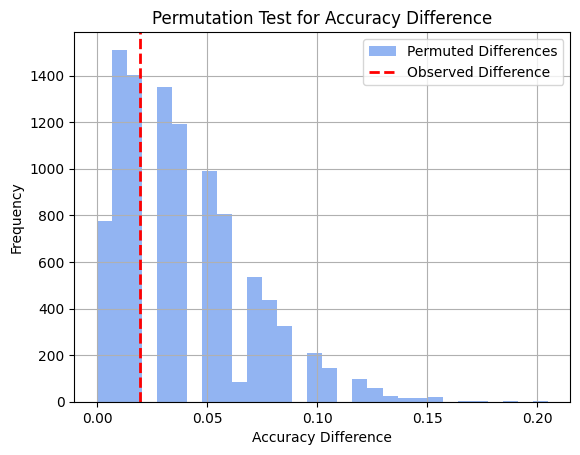

In [118]:
def permutation_test_accuracy_difference(y_true, pred_a, pred_b, num_permutations=10000):
    acc_a = accuracy_score(y_true, pred_a)
    acc_b = accuracy_score(y_true, pred_b)
    observed_difference = abs(acc_a - acc_b)

    combined_predictions = np.array(pred_a.tolist() + pred_b.tolist())
    permuted_differences = []

    for _ in range(num_permutations):
        np.random.shuffle(combined_predictions)

        perm_pred_a = combined_predictions[:len(pred_a)]
        perm_pred_b = combined_predictions[len(pred_a):]

        perm_acc_a = accuracy_score(y_true, perm_pred_a)
        perm_acc_b = accuracy_score(y_true, perm_pred_b)
        permuted_differences.append(abs(perm_acc_a - perm_acc_b))

    permuted_differences = np.array(permuted_differences)
    p_value = np.mean(permuted_differences >= observed_difference)

    return observed_difference, p_value, permuted_differences


observed_diff, p_value, perm_diffs = permutation_test_accuracy_difference(
    y_true=y_test,
    pred_a=log_reg_y_test_pred,
    pred_b=rf_y_test_pred,
    num_permutations=10000
)

print(f"Observed Accuracy Difference: {observed_diff:.4f}")
print(f"P-value: {p_value:.4f}")

plt.hist(perm_diffs, bins=30, alpha=0.7, color='cornflowerblue', label='Permuted Differences')
plt.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2, label='Observed Difference')
plt.xlabel('Accuracy Difference')
plt.ylabel('Frequency')
plt.title('Permutation Test for Accuracy Difference')
plt.legend()
plt.grid(True)
plt.show()

- ***Observed Accuracy Difference:*** *0.0195 (Logistic Regression Test Accuracy = 0.88, Random Forest Test Accuracy = 0.90).*

- ***P-value:*** *0.7467*

*Since the p-value is much greater than 0.05, we fail to reject the null hypothesis.*

***Interpretation:***\
*The observed accuracy difference of ***0.0195*** between ***Logistic Regression*** (Model A) and ***Random Forest*** (Model B) is ***not statistically significant***. The high p-value (0.7467) indicates that this difference could easily be due to random chance. In other words, we do not have sufficient evidence to claim that the performance difference between the two models is meaningful or non-random.*
*Thus, based on this permutation test, ***we conclude that the difference in performance is not statistically significant***, and both models perform similarly in terms of test accuracy.*